In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from PIL import Image
import theano

In [ ]:
CATEGORIES = ["DEPRESSED","HEALTHY"]

In [ ]:
training = []
def createTrainingData(category):  
  class_num = CATEGORIES.index(category)
  if class_num==0:
    for i in range(101,141):
      j=0
      while True:
        try:
          filename=r"/content/drive/MyDrive/Depression_Detection/Slicing_Experiment/70_sec_and_10_overlap/Spectrograms_Depressed/Mel_AI_"+str(i)+"_result_slice_"+str(j)+".png"
          img_array = cv2.imread(filename)
          new_array = cv2.resize(img_array, (430, 280))
          training.append([new_array, class_num])
          j+=70000
        except:
          break
  elif class_num==1:
    for i in range(301,345):
      j=0
      while True:
        try:
          filename=r"/content/drive/MyDrive/Depression_Detection/Slicing_Experiment/70_sec_and_10_overlap/Spectrograms_Healthy/Mel_AIC_"+str(i)+"_result_slice_"+str(j)+".png"
          img_array = cv2.imread(filename)
          new_array = cv2.resize(img_array, (430, 280))
          training.append([new_array, class_num])
          j+=70000
        except:
          break
  else:
    print("Incorrect input")
createTrainingData("DEPRESSED")

In [ ]:
len(training)

597

In [ ]:
createTrainingData("HEALTHY")

In [ ]:
len(training)

1209

In [ ]:
random.shuffle(training)

In [ ]:
X =[]
y =[]
for features, label in training:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, 430,280, 3)

In [ ]:
X = X.astype('float32')
X /= 255
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 2)
Y=np.array(Y)


In [ ]:
print(Y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [ ]:
#Exploratory Model
model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.leaky_relu,input_shape=(430,280,3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.leaky_relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(2,  activation=tf.nn.sigmoid)
])

In [ ]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size =5, epochs =50, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/50
194/194 [==============================] - 243s 1s/step - loss: 1.1195 - accuracy: 0.6815 - val_loss: 0.5711 - val_accuracy: 0.6983
Epoch 2/50
194/194 [==============================] - 237s 1s/step - loss: 0.5003 - accuracy: 0.7746 - val_loss: 0.4123 - val_accuracy: 0.7975
Epoch 3/50
194/194 [==============================] - 223s 1s/step - loss: 0.4560 - accuracy: 0.7921 - val_loss: 0.4434 - val_accuracy: 0.7851
Epoch 4/50
194/194 [==============================] - 223s 1s/step - loss: 0.3959 - accuracy: 0.8232 - val_loss: 0.4547 - val_accuracy: 0.8099
Epoch 5/50
194/194 [==============================] - 237s 1s/step - loss: 0.3827 - accuracy: 0.8480 - val_loss: 0.5678 - val_accuracy: 0.7397
Epoch 6/50
194/194 [==============================] - 228s 1s/step - loss: 0.3098 - accuracy: 0.8769 - val_loss: 0.4020 - val_accuracy: 0.8347
Epoch 7/50
194/194 [==============================] - 229s 1s/step - loss: 0.3070 - accuracy: 0.8738 - val_loss: 0.5923 - val_accuracy: 0.7149

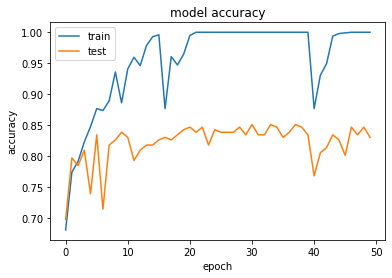

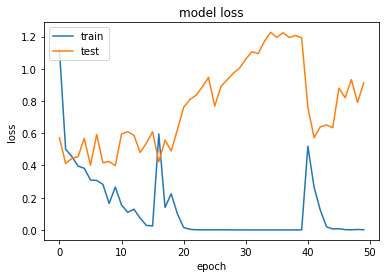

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save(r"/content/drive/MyDrive/Depression_Detection/Slicing_Experiment/70_sec_and_10_overlap/CNN80Model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Depression_Detection/Slicing_Experiment/70_sec_and_10_overlap/CNN80Model/assets


In [ ]:
model = tf.keras.models.load_model(r"/content/drive/MyDrive/Depression_Detection/Slicing_Experiment/70_sec_and_10_overlap/CNN80Model")

In [ ]:
testing=[]
test_path_1=r"/content/drive/MyDrive/Depression_Detection/With_Slicing/Healthy_People_Audio_sliced_MEL/304"
test_path_2=r"/content/drive/MyDrive/Depression_Detection/With_Slicing/Depression_People_Audio_sliced_MEL/159"
testing=[]
def createTestingData(test_path):  
  for img in os.listdir(test_path):
    img_array = cv2.imread(os.path.join(test_path,img))
    new_array = cv2.resize(img_array, (430, 280))
    testing.append([new_array])
createTestingData(test_path_2)

testing = np.array(testing).reshape(-1, 430,280, 3)
testing = testing.astype('float32')
testing /= 255
w=model(testing)

In [ ]:
w.numpy()

array([[8.1999612e-01, 2.1087193e-01],
       [8.7342358e-01, 3.6143392e-02],
       [6.6248804e-01, 7.9241782e-02],
       [9.9966526e-01, 8.4227788e-05],
       [9.9928081e-01, 1.6990304e-04],
       [1.0259095e-01, 6.5477920e-01],
       [7.2491610e-01, 7.7572197e-02],
       [1.9302100e-02, 9.7828639e-01],
       [9.6045065e-01, 2.4265707e-02],
       [9.9979162e-01, 1.2687930e-05],
       [6.3178891e-01, 1.2312329e-01],
       [5.9269017e-01, 1.1457348e-01],
       [9.7577846e-01, 2.1734089e-02],
       [4.9860975e-01, 2.1703807e-01],
       [1.0340327e-01, 7.0827234e-01],
       [1.1123151e-02, 9.5677006e-01],
       [2.9731989e-02, 7.7280819e-01],
       [5.0760895e-02, 8.0161846e-01],
       [9.6305007e-01, 1.4952183e-02],
       [9.9030757e-01, 2.4986863e-03],
       [2.6106745e-02, 9.1466630e-01],
       [8.2539779e-01, 6.3213885e-02],
       [5.9413683e-01, 3.1707191e-01],
       [9.9862397e-01, 5.4121017e-04],
       [9.9896681e-01, 2.3120642e-04]], dtype=float32)

In [ ]:
#Percentage Calculation

In [ ]:
#Final video conclusion: 15/20*100% depression= 75% depression.